In [5]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
sys.path.append('/home/jp/projects/python_tools')
import jp_mpl as jplot
from itertools import cycle
import re


In [6]:
# This is the flux calculator. It has nothing to do with samples or any of that

from scipy.interpolate import interp1d
# This is to get the original flux used:
import pickle
data = pickle.load(open('/home/jp/projects/icecube/flux_unfolding/tw_neutrino_flux_wsums_original.pckl'))
numu_tot_use_y =  ((data['sum_nue'] + data['sum_nuebar'])*data['ecenters']**3 +
                   (data['sum_numu_from_p'] + data['sum_numubar_from_p'])*data['ecenters']**3 + 
                   (data['sum_numu_from_k'] + data['sum_numubar_from_k']) *data['ecenters']**3)
#numu_tot_use_y =  ((data['sum_numu_from_p'] + data['sum_numubar_from_p'])*data['ecenters']**3 + 
#                   (data['sum_numu_from_k'] + data['sum_numubar_from_k']) *data['ecenters']**3)
f2 = interp1d(data['ecenters'], numu_tot_use_y, kind='cubic' )
#energies = np.linspace(0.3, 2.9)
energies = np.linspace(3., 980., 1000)

In [19]:
10**np.linspace(np.log10(8.), np.log10(1000), 9)

array([    8.        ,    14.6286328 ,    26.7496122 ,    48.9137818 ,
          89.4427191 ,   163.55308679,   299.06975624,   546.8727057 ,
        1000.        ])

In [32]:

true_axis = np.array([[0, 8.],[8., 15.], [15., 25.],[25., 40.], [40., 80.], [80., 1000.]])
#true_axis = np.array([[0, 8.],[8., 15.], [15., 25.],
#                      [25., 50.], [50., 90.], [90., 160.], [160., 300.], [300.,550], [550., 1000.]])

events_old = 40562.4395309
events_new = 34833.7772722
scaling_factor = 5.5

In [33]:
def readFitOutput(filename, nbins=6):
    norms = np.zeros(nbins)
    nu_fracs = np.zeros(nbins-1)
    nu_errors = np.zeros(nbins-1)
    infile = open(filename)
    for i, line in enumerate(infile):
        if i < 5:
            split_line = line.split()
            nu_fracs[i] = float(split_line[1])
            nu_errors[i] = float(split_line[2])
        if i == 5:
            split_line = re.split(' +', line)
            for j in range(1, len(split_line)):
                split_line[j] = split_line[j].replace("[", "")
                split_line[j] = split_line[j].replace("]", "")
                split_line[j] = split_line[j].replace(",", "")
                norms[j-1] = float(split_line[j])
    relative_error = nu_errors/nu_fracs

    nu_fracs = np.concatenate((nu_fracs, [1-np.sum(nu_fracs)]))
    nu_errors = np.concatenate((nu_errors, [np.mean(nu_errors)]))
    relative_error = np.concatenate((relative_error, [np.mean(relative_error)]))
    return norms, nu_fracs, nu_errors, relative_error

In [34]:
norms_old, nu_fracs_old, nu_errors_old, relative_error_old = readFitOutput('input.txt')

In [35]:
norms_new, nu_fracs_new, nu_errors_new, relative_error_new = readFitOutput('input_new.txt')

In [36]:
norms_new2, nu_fracs_new2, nu_errors_new2, relative_error_new2 = readFitOutput('input_new2.txt')

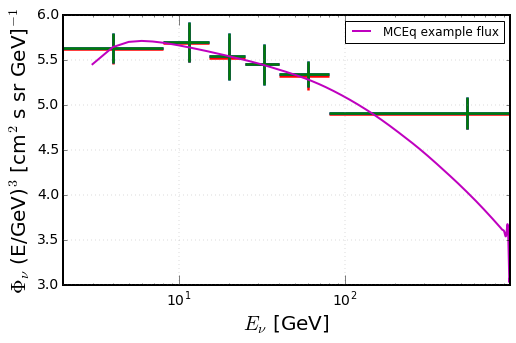

In [37]:

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
for i, one_norm in enumerate(norms_old):
    #plt.plot(true_axis[i], [norms[i]]*2)
    #jplot.errorMark(true_axis[i], scaling_factor*norms[i], error=scaling_factor*norm_errors[i])
    jplot.errorMark(true_axis[i], scaling_factor*norms_old[i], 
                    error = relative_error_old[i]*norms_old[i]*scaling_factor,
                    color = 'red')
    jplot.errorMark(true_axis[i], scaling_factor*norms_new[i], 
                    error = relative_error_new[i]*norms_new[i]*scaling_factor,
                   color = 'blue')
    jplot.errorMark(true_axis[i], scaling_factor*norms_new2[i], 
                    error = relative_error_new2[i]*norms_new2[i]*scaling_factor,
                   color = 'green')
    

### This is Tania's figure
plt.plot(energies, f2(energies)/1.03, label = 'MCEq example flux')
#plt.yscale('log')
plt.xscale('log')
plt.xlim([2, energies.max()])
#plt.ylim(0., 10.)

#plt.plot([2, 1000.], [5.5, 5.5], '--r')
#plt.xlabel('Neutrino energy (GeV)')
plt.xlabel(r"$E_\nu$ [GeV]", fontsize=20)
plt.ylabel(r"$\Phi_{\nu}$ (E/GeV)$^{" + str(3) + "}$ [cm$^{2}$ s sr GeV]$^{-1}$", fontsize=20)
plt.legend(loc=0)
#plt.xlim([3,100])
fig.subplots_adjust(bottom = 0.15)
fig.savefig('Tania.pdf')
fig.savefig('Tania.png')


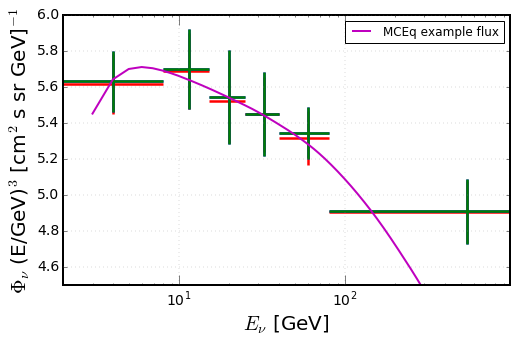

In [42]:

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
for i, one_norm in enumerate(norms_old):
    
    
    jplot.errorMark(true_axis[i], scaling_factor*norms_old[i], 
                    error = relative_error_old[i]*norms_old[i]*scaling_factor,
                    color = 'red')
    jplot.errorMark(true_axis[i], scaling_factor*norms_new[i], 
                    error = relative_error_new[i]*norms_new[i]*scaling_factor,
                   color = 'blue')
    jplot.errorMark(true_axis[i], scaling_factor*norms_new2[i], 
                    error = relative_error_new2[i]*norms_new2[i]*scaling_factor,
                   color = 'green')
    

### This is Tania's figure
plt.plot(energies, f2(energies)/1.03, label = 'MCEq example flux')
#plt.yscale('log')
plt.xscale('log')
plt.xlim([2, energies.max()])
plt.ylim(4.5, 6.)

#plt.plot([2, 1000.], [5.5, 5.5], '--r')
#plt.xlabel('Neutrino energy (GeV)')
plt.xlabel(r"$E_\nu$ [GeV]", fontsize=20)
plt.ylabel(r"$\Phi_{\nu}$ (E/GeV)$^{" + str(3) + "}$ [cm$^{2}$ s sr GeV]$^{-1}$", fontsize=20)
plt.legend(loc=0)
#plt.xlim([3,100])
fig.subplots_adjust(bottom = 0.15)
fig.savefig('Tania.pdf')
fig.savefig('Tania.png')


(2, 980.0)

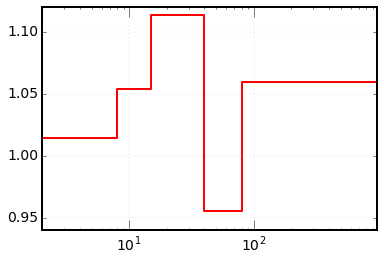

In [39]:
#jplot.unfilledBar(np.unique(true_axis.flatten()),relative_error_new/relative_error_old)
jplot.unfilledBar(np.unique(true_axis.flatten()),relative_error_new2/relative_error_old, color = 'red')

plt.xscale('log')
plt.xlim([2, energies.max()])


In [37]:
true_axis.flatten()

array([    0.,     8.,     8.,    15.,    15.,    25.,    25.,    40.,
          40.,    80.,    80.,  1000.])